In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# for OLS method
import statsmodels.api as sm
#the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import metrics

In [2]:
# Load the data from a .csv in the same folder
data = pd.read_csv(r'C:\Users\nijat\Desktop\PYTHON - KURS\Projects\Student marks multiple linear regression\Student_Marks.csv')
data

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [3]:
data.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

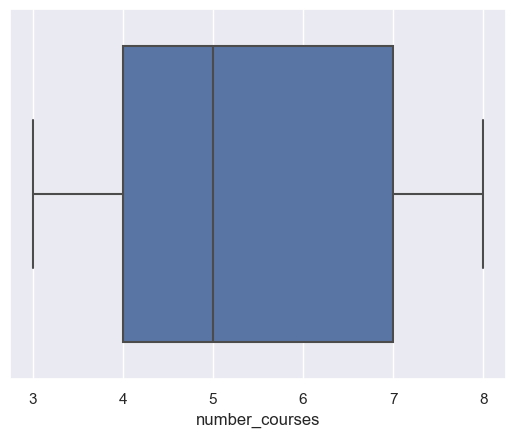

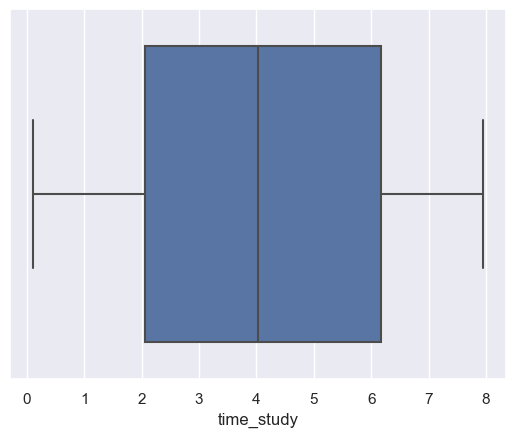

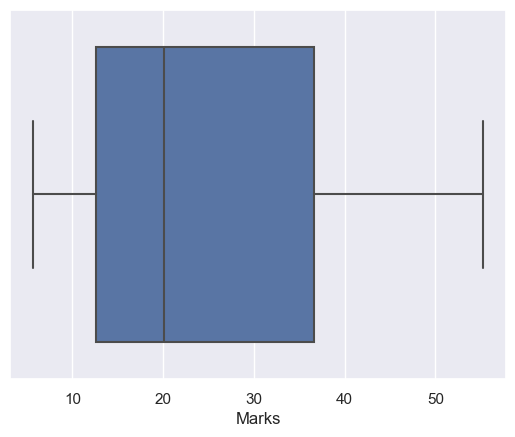

In [4]:
for i in data.columns:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [5]:
data.columns

Index(['number_courses', 'time_study', 'Marks'], dtype='object')

In [6]:
x = data[['number_courses', 'time_study']]
y = data['Marks']

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['number_courses', 'time_study']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,3.662129,number_courses
1,3.662129,time_study


In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [9]:
reg = LinearRegression()

In [10]:
reg.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = reg.predict(X_test)

In [12]:
y_pred

array([19.27278272, 37.76035676, 20.18779372,  9.65670863, 10.97508223,
       44.81200554, 13.34810968, 47.62447209, 37.01567001, 22.30738483,
       44.48113375, 28.33573684,  7.42332402, 38.70638699, 28.10820618,
       48.74122069, 35.72331468, 39.30103485, 28.29432156,  8.94326632])

In [13]:
X_test['actual'] = y_test
X_test['predicted'] = y_pred

X_test

,number_courses,time_study,actual,predicted
83,5,3.197,16.106,19.272783
53,7,6.049,36.653,37.760357
70,4,3.736,16.606,20.187794
45,3,2.061,8.924,9.656709
44,4,1.954,9.742,10.975082
39,6,7.775,51.142,44.812006
22,5,2.051,12.209,13.348110
80,7,7.957,54.321,47.624472
10,3,7.353,42.036,37.015670
0,3,4.508,19.202,22.307385


In [14]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 3.0793452296666812
MSE is 14.200726136374538
RMSE is 3.7683850833446595
R2 score is 0.9459936100591214


In [15]:
data

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [16]:
data_new = {
       'number_courses' : [5, 4, 7, 9, 10, 4, 5, 12],
        'time_study': [2.5, 6.3, 7.9, 5.6, 8.1, 2.4, 6.4, 9.9]}
 
# Create DataFrame
data_new = pd.DataFrame(data_new)

In [17]:
data_new

,number_courses,time_study
0,5,2.5
1,4,6.3
2,7,7.9
3,9,5.6
4,10,8.1
5,4,2.4
6,5,6.4
7,12,9.9


In [18]:
target=reg.predict(data_new)

In [19]:
target

array([15.6693821 , 33.44334492, 47.3297894 , 39.18218411, 53.9784134 ,
       13.28084504, 35.83188198, 67.02728235])

In [20]:
data_new['Predicted_target'] = target

In [21]:
data_new

,number_courses,time_study,Predicted_target
0,5,2.5,15.669382
1,4,6.3,33.443345
2,7,7.9,47.329789
3,9,5.6,39.182184
4,10,8.1,53.978413
5,4,2.4,13.280845
6,5,6.4,35.831882
7,12,9.9,67.027282


In [22]:
data_new2 = {
       'number_courses' : [5, 5, 5, 5, 5],
        'time_study': [2.5, 3, 3.5, 4, 4.5]}
 
# Create DataFrame
data_new2 = pd.DataFrame(data_new2)

In [23]:
data_new2

,number_courses,time_study
0,5,2.5
1,5,3.0
2,5,3.5
3,5,4.0
4,5,4.5


In [24]:
target=reg.predict(data_new2)

In [25]:
target

array([15.6693821 , 18.25431798, 20.83925386, 23.42418975, 26.00912563])

In [26]:
data_new2['Predicted_target'] = target

In [27]:
data_new2

,number_courses,time_study,Predicted_target
0,5,2.5,15.669382
1,5,3.0,18.254318
2,5,3.5,20.839254
3,5,4.0,23.424190
4,5,4.5,26.009126
